In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 

下載cifar10資料集

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

顯示前10張圖片(白化前)

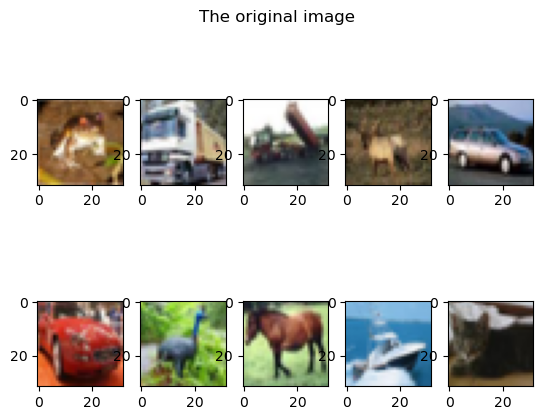

In [4]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

建立ImageDataGenerator的操作物件

In [8]:
datagen = ImageDataGenerator(zca_whitening = True)

TypeError: ImageDataGenerator.__init__() got an unexpected keyword argument 'zac_whitening'

In [7]:
# 自定義圖像白化函數
def zac_whitening(image):
    # 此處實現圖像白化的具體操作
    # 假設 image 是一個 numpy 陣列，表示一張圖像
    # 在這裡可以實現圖像白化的相應算法
    # 這裡僅提供一個示例，實際的白化算法可能會根據你的需求而不同
    mean = np.mean(image)
    std = np.std(image)
    whitened_image = (image - mean) / std
    return whitened_image

In [ ]:
# 創建一個 ImageDataGenerator 物件，並指定 preprocessing_function 參數
datagen = ImageDataGenerator(
    preprocessing_function=zac_whitening
)

執行白化處理

In [ ]:
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

讓生成的圖像效果看起來更明顯

In [ ]:
X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.max()))
X_batch += 127
X_batch = X_batch.astype('uint8')

顯示前10張圖片(白化後)

In [ ]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_batch[i])
plt.suptitle('Whitening result', fontsize = 12)
plt.show()